In [165]:
# loading data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from boruta import BorutaPy
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

table1 = pd.read_csv('C:\\Users\\rcjan\\Downloads\\train.csv', low_memory=False)
table1.head()
table1 = table1.set_index('Id')

Note: you may need to restart the kernel to use updated packages.


In [143]:
table2 = table1.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)
table2.dropna(axis=0,how = 'any',inplace = True)

In [144]:
table2['LotFrontage'] = table2['LotFrontage'].astype('int64')
table2['MasVnrArea'] = table2['MasVnrArea'].astype('int64')
table2['GarageYrBlt'] = table2['GarageYrBlt'].astype('int64')

In [145]:
numerical = table2.select_dtypes(np.number)
objects = table2.select_dtypes('object')
display(numerical.head())
display(objects.head())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65,8450,7,5,2003,2003,196,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80,9600,6,8,1976,1976,0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68,11250,7,5,2001,2002,162,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60,9550,7,5,1915,1970,0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84,14260,8,5,2000,2000,350,655,0,...,192,84,0,0,0,0,0,12,2008,250000


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [146]:
label_objects = objects.copy()
label_encoder = LabelEncoder()
for col in objects:
    label_objects[col] = label_encoder.fit_transform(objects[col])

In [147]:
label_objects.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,3,1,3,3,0,4,0,5,2,2,...,4,2,5,1,1,4,4,2,8,4
2,3,1,3,3,0,2,0,24,1,2,...,4,3,5,1,1,4,4,2,8,4
3,3,1,0,3,0,4,0,5,2,2,...,4,2,5,1,1,4,4,2,8,4
4,3,1,0,3,0,0,0,6,2,2,...,4,2,5,5,2,4,4,2,8,0
5,3,1,0,3,0,2,0,15,2,2,...,4,2,5,1,1,4,4,2,8,4


In [148]:
train_table = numerical.merge(label_objects, on = 'Id')
train_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1094 non-null   int64
 1   LotFrontage    1094 non-null   int64
 2   LotArea        1094 non-null   int64
 3   OverallQual    1094 non-null   int64
 4   OverallCond    1094 non-null   int64
 5   YearBuilt      1094 non-null   int64
 6   YearRemodAdd   1094 non-null   int64
 7   MasVnrArea     1094 non-null   int64
 8   BsmtFinSF1     1094 non-null   int64
 9   BsmtFinSF2     1094 non-null   int64
 10  BsmtUnfSF      1094 non-null   int64
 11  TotalBsmtSF    1094 non-null   int64
 12  1stFlrSF       1094 non-null   int64
 13  2ndFlrSF       1094 non-null   int64
 14  LowQualFinSF   1094 non-null   int64
 15  GrLivArea      1094 non-null   int64
 16  BsmtFullBath   1094 non-null   int64
 17  BsmtHalfBath   1094 non-null   int64
 18  FullBath       1094 non-null   int64
 19  HalfBa

In [149]:
corrMatrix = train_table.corr()
print(corrMatrix)
#consider removing Overall quality - as it is correlated with many other variables

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.389466 -0.197903     0.031639    -0.085553   
LotFrontage     -0.389466     1.000000  0.419714     0.241169    -0.047132   
LotArea         -0.197903     0.419714  1.000000     0.169876    -0.033113   
OverallQual      0.031639     0.241169  0.169876     1.000000    -0.189587   
OverallCond     -0.085553    -0.047132 -0.033113    -0.189587     1.000000   
...                   ...          ...       ...          ...          ...   
GarageQual       0.000741     0.061895  0.017422     0.137583    -0.116673   
GarageCond      -0.006517     0.054801  0.032922     0.181802    -0.030896   
PavedDrive      -0.022592     0.080518  0.007309     0.168885    -0.114669   
SaleType        -0.003957    -0.026790  0.011657    -0.072425     0.098594   
SaleCondition   -0.022491     0.050027  0.056401     0.214877    -0.009030   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1 

In [293]:
#Finding correlated features and pulling them into a set
correlated_features = set()
correlation_matrix = train_table.drop('SalePrice', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
display(correlated_features)

#Dropping correlated features
train_data = train_table.drop(correlated_features,axis=1)
train_data.info()

{'1stFlrSF', 'Exterior2nd', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'}

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 1 to 1460
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1094 non-null   int64
 1   LotFrontage    1094 non-null   int64
 2   LotArea        1094 non-null   int64
 3   OverallQual    1094 non-null   int64
 4   OverallCond    1094 non-null   int64
 5   YearBuilt      1094 non-null   int64
 6   YearRemodAdd   1094 non-null   int64
 7   MasVnrArea     1094 non-null   int64
 8   BsmtFinSF1     1094 non-null   int64
 9   BsmtFinSF2     1094 non-null   int64
 10  BsmtUnfSF      1094 non-null   int64
 11  TotalBsmtSF    1094 non-null   int64
 12  2ndFlrSF       1094 non-null   int64
 13  LowQualFinSF   1094 non-null   int64
 14  GrLivArea      1094 non-null   int64
 15  BsmtFullBath   1094 non-null   int64
 16  BsmtHalfBath   1094 non-null   int64
 17  FullBath       1094 non-null   int64
 18  HalfBath       1094 non-null   int64
 19  Bedroo

In [285]:
#Create dependent variable and independent variables
X = train_data.drop(['SalePrice'], axis = 1)
y = train_data['SalePrice']

#split data into a training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [257]:
#Scale the data with Robust Scaler to get rid of any undetected outliers
scaler= RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(np.where(rfecv.support_ == False)[0])
#X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

In [260]:
data_x = pd.DataFrame(train_data)
names = data_x.columns
# use linear regression as the model
lr = LinearRegression()
# continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X_train,y_train)

print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Features sorted by their rank:
[(1, 'OverallQual'), (2, 'GarageCars'), (3, 'KitchenAbvGr'), (4, 'BsmtFullBath'), (5, 'Condition1'), (6, 'FullBath'), (7, 'Electrical'), (8, 'MSZoning'), (9, 'Fireplaces'), (10, 'MasVnrType'), (11, 'HalfBath'), (12, 'HeatingQC'), (13, 'Foundation'), (14, 'Condition2'), (15, 'RoofStyle'), (16, 'HouseStyle'), (17, 'GarageCond'), (18, 'OverallCond'), (19, 'BedroomAbvGr'), (20, 'BsmtCond'), (21, 'KitchenQual'), (22, 'LotConfig'), (23, 'BsmtHalfBath'), (24, 'BsmtExposure'), (25, 'BldgType'), (26, 'BsmtFinType2'), (27, 'LotShape'), (28, 'CentralAir'), (29, 'Street'), (30, 'PavedDrive'), (31, 'GarageFinish'), (32, 'ExterQual'), (33, 'BsmtQual'), (34, 'SaleType'), (35, 'Utilities'), (36, 'YrSold'), (37, 'MoSold'), (38, 'BsmtFinType1'), (39, 'GarageQual'), (40, 'LandSlope'), (41, 'Neighborhood'), (42, 'GarageType'), (43, 'RoofMatl'), (44, 'Heating'), (45, 'Exterior1st'), (46, 'MSSubClass'), (47, 'LotFrontage'), (48, 'GrLivArea'), (49, 'Functional'), (50, '3SsnPorc

In [261]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
 #naming the dataframe columns
featureScores.columns = ['Specs','Score'] 
#print 10 best features
print(featureScores.nlargest(25,'Score'))  

            Specs         Score
2         LotArea  1.473400e+06
29        MiscVal  5.720453e+05
12       2ndFlrSF  2.920915e+05
8      BsmtFinSF1  2.586884e+05
9      BsmtFinSF2  2.230566e+05
28       PoolArea  1.834335e+05
7      MasVnrArea  1.791699e+05
13   LowQualFinSF  1.779497e+05
10      BsmtUnfSF  1.694519e+05
26      3SsnPorch  1.632322e+05
14      GrLivArea  1.128885e+05
27    ScreenPorch  1.010508e+05
11    TotalBsmtSF  8.355318e+04
23     WoodDeckSF  8.074798e+04
25  EnclosedPorch  7.162383e+04
24    OpenPorchSF  5.082905e+04
0      MSSubClass  1.366470e+04
1     LotFrontage  3.860474e+03
39   Neighborhood  1.498222e+03
42       BldgType  1.417294e+03
57      HeatingQC  9.371927e+02
62     GarageType  6.468407e+02
56        Heating  5.412292e+02
54   BsmtFinType1  5.117198e+02
43     HouseStyle  5.017084e+02


[0.01740245 0.03049348 0.03207543 0.02420928 0.01847645 0.03061994
 0.03110368 0.02192242 0.02929203 0.00851853 0.03393839 0.03423224
 0.01955616 0.00116791 0.0348216  0.01723733 0.00526055 0.01204107
 0.01284647 0.02109834 0.00189716 0.01856802 0.01561975 0.02579325
 0.02786914 0.00941834 0.00178547 0.00769973 0.00040133 0.00285571
 0.03241028 0.03041893 0.01166644 0.00017227 0.01483283 0.00766926
 0.         0.01696439 0.00403124 0.02648535 0.01021906 0.00082747
 0.00748238 0.01443302 0.01429592 0.00143017 0.02315317 0.01662021
 0.00998909 0.00819838 0.01195411 0.01380332 0.00708952 0.01849107
 0.02338023 0.00794035 0.00141614 0.01716996 0.00390488 0.00570093
 0.01493012 0.00593115 0.01390582 0.01912004 0.00419951 0.0032972
 0.00462083 0.01014746 0.01347588]


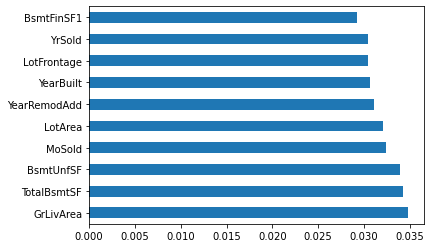

In [262]:
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [282]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=20, step=5, verbose=5)
rfe_selector.fit(X_train, y_train)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

Fitting estimator with 69 features.


C:\Users\rcjan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 64 features.


C:\Users\rcjan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 59 features.


C:\Users\rcjan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 54 features.


C:\Users\rcjan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 49 features.


C:\Users\rcjan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 44 features.


C:\Users\rcjan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 39 features.


C:\Users\rcjan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 34 features.


C:\Users\rcjan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 29 features.


C:\Users\rcjan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 24 features.


C:\Users\rcjan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


20 selected features
['MSSubClass', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']


C:\Users\rcjan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [292]:
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=15, step=3, verbose=5)
rfe_selector.fit(X_train, y_train)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_support)
print(rfe_feature)

Fitting estimator with 69 features.
Fitting estimator with 66 features.
Fitting estimator with 63 features.
Fitting estimator with 60 features.
Fitting estimator with 57 features.
Fitting estimator with 54 features.
Fitting estimator with 51 features.
Fitting estimator with 48 features.
Fitting estimator with 45 features.
Fitting estimator with 42 features.
Fitting estimator with 39 features.
Fitting estimator with 36 features.
Fitting estimator with 33 features.
Fitting estimator with 30 features.
Fitting estimator with 27 features.
Fitting estimator with 24 features.
Fitting estimator with 21 features.
Fitting estimator with 18 features.
15 selected features
[False  True  True False False  True  True  True  True False  True  True
  True False  True False False False False False False False False  True
  True False False False False False  True  True False False False False
 False False False  True False False False False False False False False
 False False False False False False Fa

In [266]:
#Subset by Top 15 features
top_feats = train_data[['SalePrice','MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'Neighborhood', 'Exterior1st', 'BsmtFinType1']]
top_feats.head()


,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,TotalBsmtSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,Neighborhood,Exterior1st,BsmtFinType1
Id,,,,,,,,,,,,,,,,,,,,,
1,208500,60,65,8450,7,5,2003,2003,196,706,...,856,854,1710,0,61,2,2008,5,11,2
2,181500,20,80,9600,6,8,1976,1976,0,978,...,1262,0,1262,298,0,5,2007,24,7,0
3,223500,60,68,11250,7,5,2001,2002,162,486,...,920,866,1786,0,42,9,2008,5,11,2
4,140000,70,60,9550,7,5,1915,1970,0,216,...,756,756,1717,0,35,2,2006,6,12,0
5,250000,60,84,14260,8,5,2000,2000,350,655,...,1145,1053,2198,192,84,12,2008,15,11,2


In [267]:
#Create dependent variable and independent variables
X = top_feats.drop(['SalePrice'], axis = 1)
y = top_feats['SalePrice']

#split data into a training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

#Rescaling with RobustScaler
scaler= RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [268]:
# Linear Regression Model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
round(linreg.score(X_train, y_train), 2)

0.76

In [269]:
#Fit the Ridge Regression Model with the tuned parameter
ridge2 = Ridge(alpha = 0.05, normalize = True)
ridge2.fit(X_train, y_train)
y_pred2 = ridge2.predict(X_test)

# get evaluation metrics
mse2 = round(mean_squared_error(y_test, y_pred2), 2)
rmse2 = round(mean_squared_error(y_test, y_pred2, squared=False), 2)
r22 = round(ridge2.score(X_test, y_test), 2)
print("Model performance:\nMSE: {}\nRMSE: {}\nR2 score: {}".format(mse2, rmse2, r22))

Model performance:
MSE: 1116269667.85
RMSE: 33410.62
R2 score: 0.84
